# AMC Customer Data Analysis


##Context

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

###Objective

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

###Data Description

Age: The age of the individual in years.

Gender: The gender of the individual, categorized as male or female.

Profession: The occupation or profession of the individual.

Marital_status: The marital status of the individual, such as married &, single

Education: The educational qualification of the individual Graduate and Post Graduate

No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

Salary: The individual's salary or income.

Partner_salary: The salary or income of the individual's partner, if applicable.

Total_salary: The total combined salary of the individual and their partner (if applicable).

Price: The price of a product or service.

Make: The type of automobile

# Data Overview

##Importing the necessary libraries and the dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Command to tell Python to actually display the graphs
%matplotlib inline

In [ ]:
 # to restrict the float value to 3 decimal places
 pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
file_path="/content/drive/My Drive/austo_automobile.csv"
df=pd.read_csv(file_path)

In [ ]:
pd.option_context('mode.use_inf_as_na', True)

## Understanding the data

**Displaying the first and last 5 rows of the data**

In [ ]:

df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.00,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.00,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.00,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.00,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.00,139900,57000,SUV


In [ ]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.00,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.00,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.00,31600,31000,Hatchback


**Structure and Types of Data**

In [ ]:
# Checking the shape of the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1581 rows and 14 columns.


In [ ]:
# Checking the structure and types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


**Observations:**



*   The dataset contains 1581 rows and 14 Columns
*   There are 6 numerical columns in the data and 8 object type columns.
*   It can be observed that Gender and Partner Salary columns have less entries than other columns (less than 1581 rows) which indicates that there is missing values in the data.







**Checking the Statistical Summary of the data**

In [ ]:
# Statistical summary of the Numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.00,31.92,8.43,22.00,25.00,29.00,38.00,54.00
No_of_Dependents,1581.00,2.46,0.94,0.00,2.00,2.00,3.00,4.00
Salary,1581.00,60392.22,14674.83,30000.00,51900.00,59500.00,71800.00,99300.00
Partner_salary,1475.00,20225.56,19573.15,0.00,0.00,25600.00,38300.00,80500.00
Total_salary,1581.00,79626.00,25545.86,30000.00,60500.00,78000.00,95900.00,171000.00
Price,1581.00,35597.72,13633.64,18000.00,25000.00,31000.00,47000.00,70000.00


**Observations:**



*   The age of individuals ranges from 22 to 54 years. 50% of individuals are 29 years or below.
*   Maximum No. of Dependent is upto 4 person.

*   Salaries ranges from 30,000 to 99,300, with a mean salary of 60,392.

*   Partner salaries ranges from 0 to 80,500, with a mean of 20,225.

*   Total salaries ranges from 30,000 to 171,000, with a mean of 79,626.

*   Prices of automobiles ranges from 18,000 to 70,000.

**Checking for the missing values**

In [ ]:
# Checking for missing values in the data
df.isnull()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1577,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1578,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1579,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Check for missing values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [ ]:
# Checking for sum of missing values in the data
df.isnull().sum().sum()

159

**Observations:**

* There are total of 159 missing values.

* Gender column has 53 missing values.

* Partner salary column has 106 missing values.

**Handling Missing Values and Data Irregularities**

Treating the missing values -

For Gender Column: Missing value is filled with 'Unknown'

For Partner_salary, missing values is filled with 0 if Partner_working is NO and if Partner_working is YES then missing value is filled with the formulae "Total_Salary-salary=Partner_Salary"


In [ ]:
# Displaying the rows where gender is null
df.loc[df['Gender'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,Yes,No,Yes,78000,600.00,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,87900,700.00,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,Yes,No,Yes,80900,30000.00,110900,49000,SUV
125,47,NaN,Salaried,Single,Post Graduate,2,Yes,No,No,87200,0.00,87200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.00,68600,50000,SUV
302,41,NaN,Salaried,Married,Graduate,1,Yes,No,No,55900,0.00,55900,32000,Sedan
325,40,NaN,Business,Married,Graduate,1,No,Yes,No,59600,0.00,59600,31000,Sedan
463,36,NaN,Salaried,Married,Post Graduate,3,Yes,No,No,66600,0.00,66600,49000,SUV
485,35,NaN,Business,Married,Post Graduate,2,Yes,Yes,Yes,61600,25000.00,86600,31000,Sedan
528,34,NaN,Salaried,Single,Post Graduate,2,No,Yes,No,64800,0.00,64800,32000,Sedan


In [ ]:
# Displaying the rows where Partner salary is null
df.loc[df['Partner_salary'].isnull()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [ ]:
# For Partner_salary, fill missing values with 0 If Partner_working is NO and if Partner_working is YES then use formula to fill the missing value Total_Salary-salary=Partner_Salary

def fill_partner_salary(row):
  if row['Partner_working'] == 'No':
    return 0
  else:
    return row['Total_salary'] - row['Salary']

df['Partner_salary'].fillna(df.apply(fill_partner_salary, axis=1), inplace=True)

In [ ]:
# Inputing null values for the missing values in gender column

df['Gender'].fillna('Unknown', inplace=True)

In [ ]:
# Verifying that there are no missing values left
print(df.isnull().sum())

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


Now, we will check for the data irregulariries in catagorical column

In [ ]:
# Check for data irregularities in catagorical columns

print(df['Gender'].unique())
print(df['Profession'].unique())
print(df['Marital_status'].unique())
print(df['Education'].unique())
print(df['Personal_loan'].unique())
print(df['House_loan'].unique())
print(df['Partner_working'].unique())
print(df['Make'].unique())

['Male' 'Femal' 'Female' 'Unknown' 'Femle']
['Business' 'Salaried']
['Married' 'Single']
['Post Graduate' 'Graduate']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['SUV' 'Sedan' 'Hatchback']


**Observations:***

There is Wrong Spell word found in gender column (Femal, Femle), which needs to be corrected.

In [ ]:
# Displaying the row where gender column have 'femal' and 'femle'

df.loc[(df['Gender'] == 'Femal') | (df['Gender'] == 'Femle')]


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.00,165800,61000,SUV
305,40,Femle,Business,Married,Post Graduate,4,No,No,Yes,70000,70800.00,140800,65000,SUV


In [ ]:
# Correcting irregular entries in Gender column
df.Gender.replace("Femal","Female",inplace=True)
df.Gender.replace("Femle","Female",inplace=True)

In [ ]:
# Verifying the data irregularities

print(df['Gender'].unique())
print(df['Profession'].unique())
print(df['Marital_status'].unique())
print(df['Education'].unique())
print(df['Personal_loan'].unique())
print(df['House_loan'].unique())
print(df['Partner_working'].unique())
print(df['Make'].unique())

['Male' 'Female' 'Unknown']
['Business' 'Salaried']
['Married' 'Single']
['Post Graduate' 'Graduate']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['SUV' 'Sedan' 'Hatchback']


**Inference:**

All the misiing values and data irregularities have been treated.

Now the data is ready for Analysis.

## Exploratory Data Analysis (EDA)

# Univariate Analysis

**Observation on Catagorical Attributes**

In [ ]:
# Univariate analysis for categorical variables
categorical_columns = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']

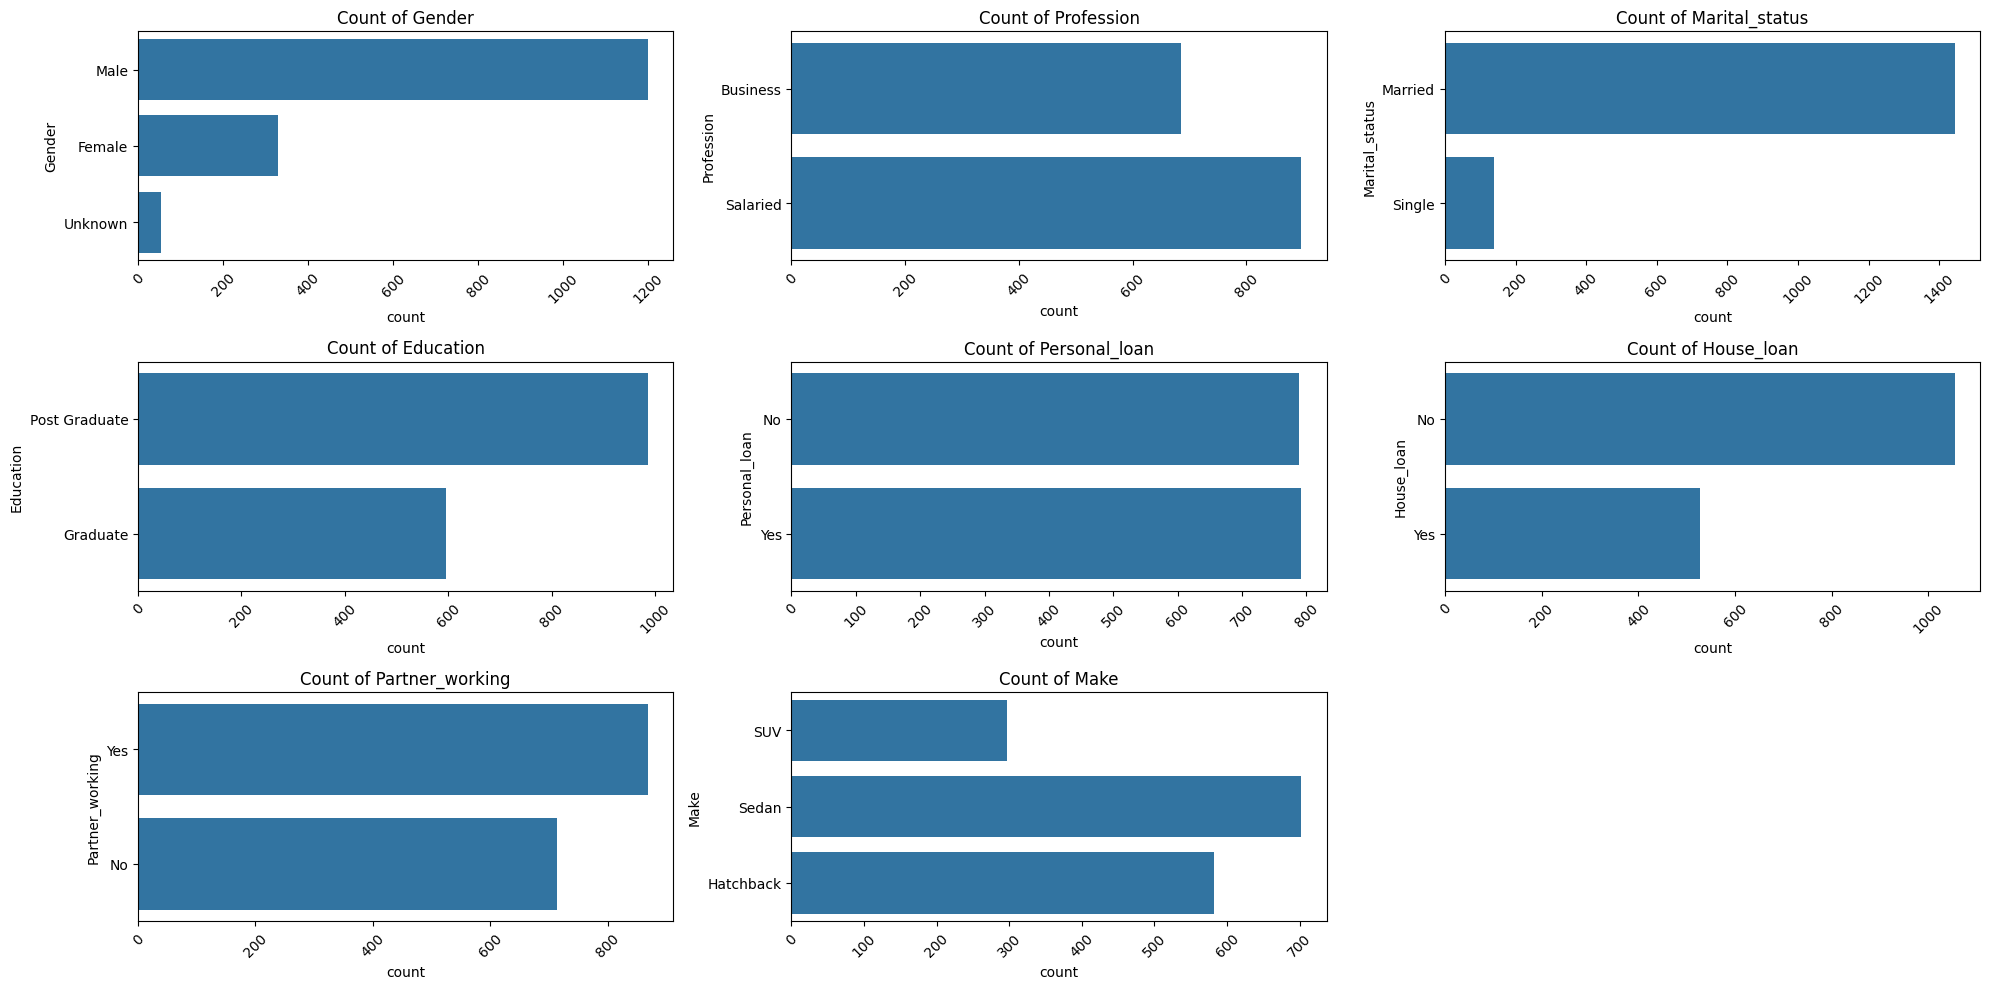

In [ ]:
# Plotting count plots for categorical variables
plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(df[column])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The count of Male customer is more than the female customer.
* Salaried Person Perfer to buy cars more then Business Person.
* Married individual more potential buyer of car than those who are single.
* The count of individuals with a post-graduate education is higher than those with a graduate education, which implies that a Post-graduate background individual have high chances of buying a car
* Person without house loan have brought more cars than Person with house loan.
* The individuals With or without Personal loan have very little significant as the no. of person buying car who has personal loan and who does not have personal loan are same.
* Customer purchase sedan car more than the other two types of car.


**Observation on Numerical attributes**

In [ ]:
# Univariate analysis for numerical variables
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.00,31.92,8.43,22.00,25.00,29.00,38.00,54.00
No_of_Dependents,1581.00,2.46,0.94,0.00,2.00,2.00,3.00,4.00
Salary,1581.00,60392.22,14674.83,30000.00,51900.00,59500.00,71800.00,99300.00
Partner_salary,1581.00,19233.78,19670.39,0.00,0.00,25100.00,38100.00,80500.00
Total_salary,1581.00,79626.00,25545.86,30000.00,60500.00,78000.00,95900.00,171000.00
Price,1581.00,35597.72,13633.64,18000.00,25000.00,31000.00,47000.00,70000.00


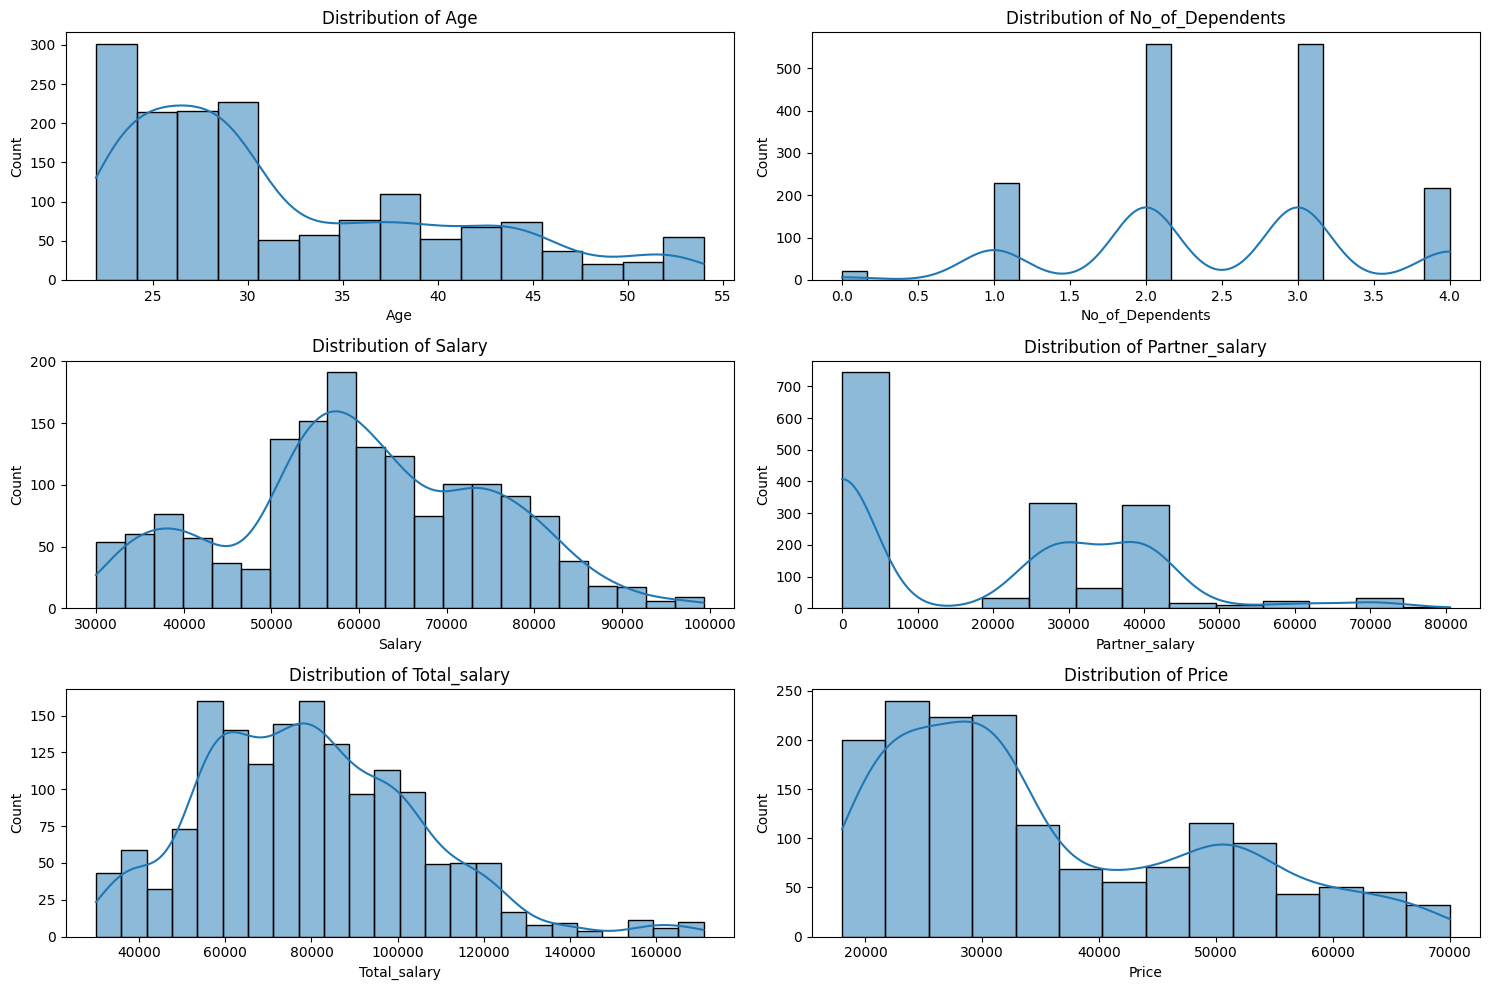

In [ ]:
# Plotting distributions for numerical variables

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

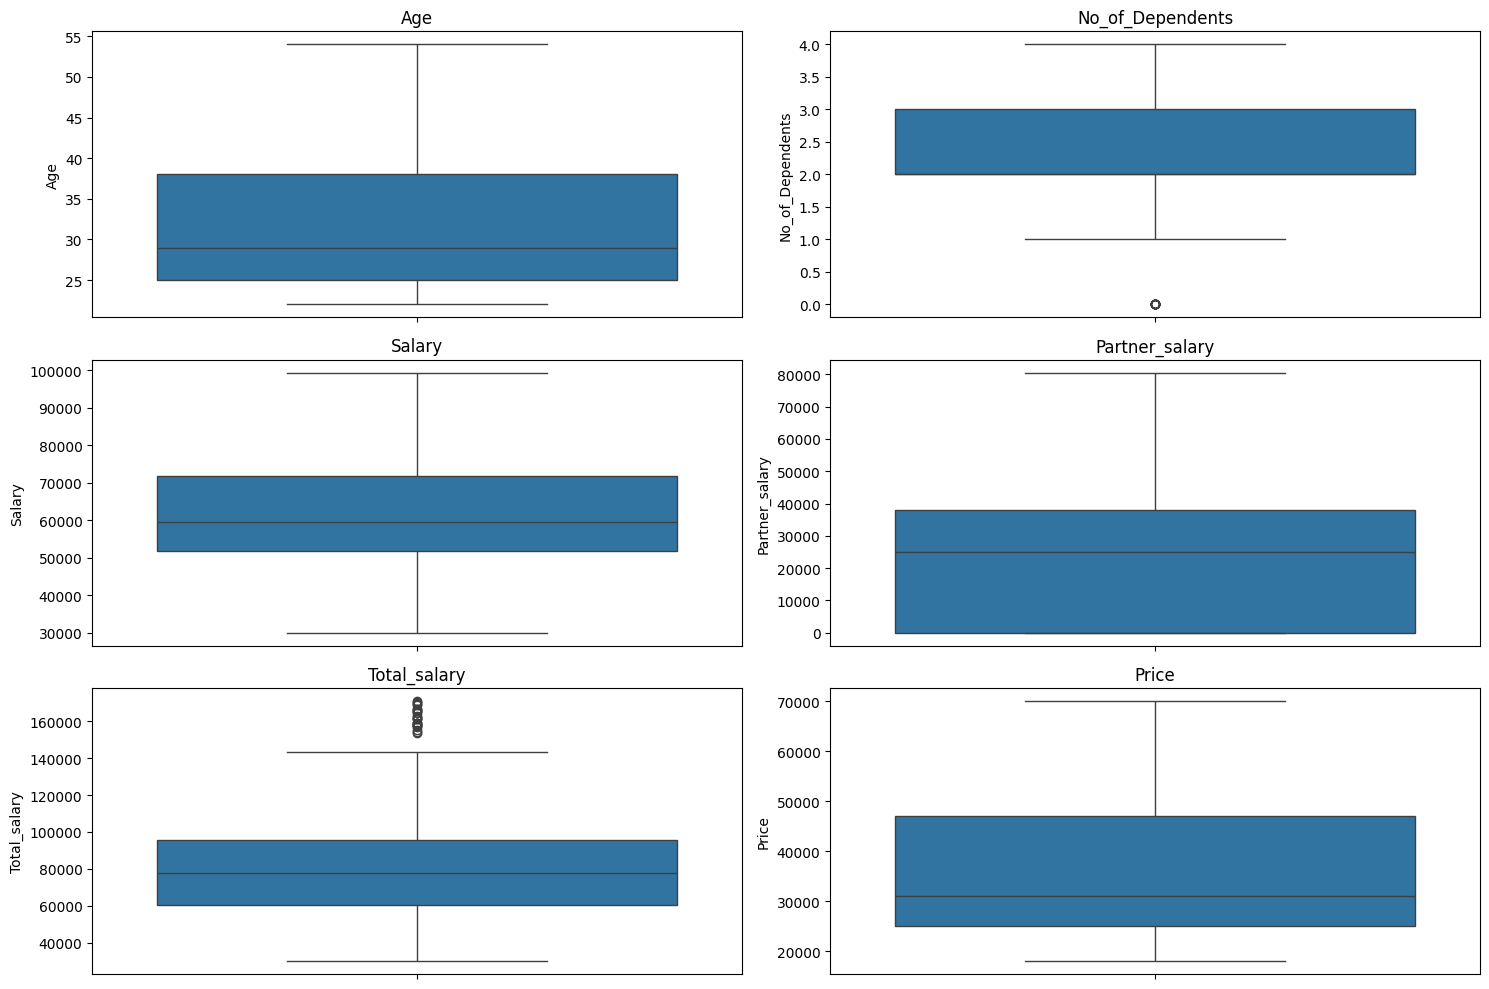

In [ ]:
# Detecting outliers using boxplot on numerical variables

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[column], whis=1.5)
    plt.title(column)
plt.tight_layout()
plt.show()

* Distribution of Age, Salary, Partner salary, Total Salary, Price are right skewed.

* It can be seen that Total Salary and No. of Dependent Column have outliers

* The outliers in this columns can be considered as genuine values because No. of Dependent Person can be 0 and Total salary of an individual can be more than 1,40,000 . In the case we will not consider these values as outliers.

# Bivariate Analysis

Numerical vs. Numerical



Scatter Plots and Correlation Matrix

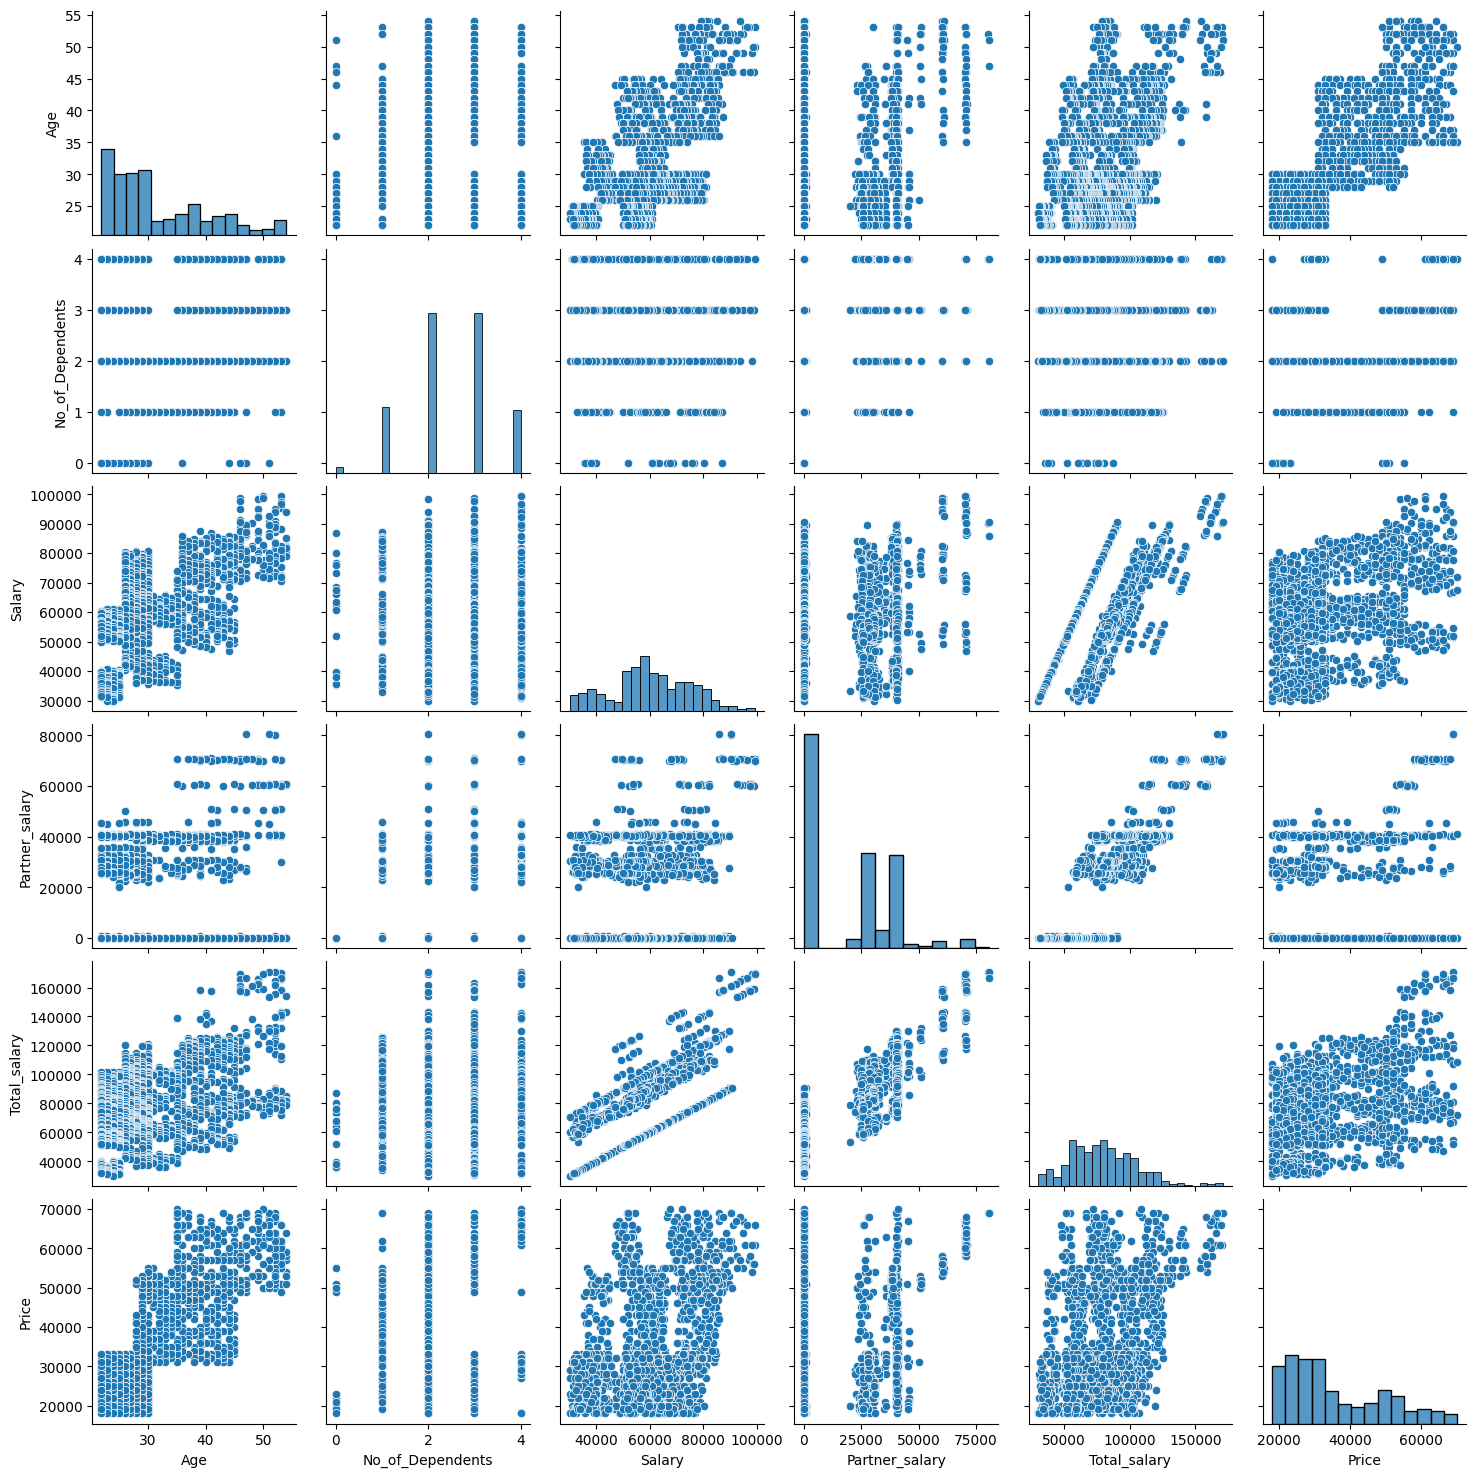

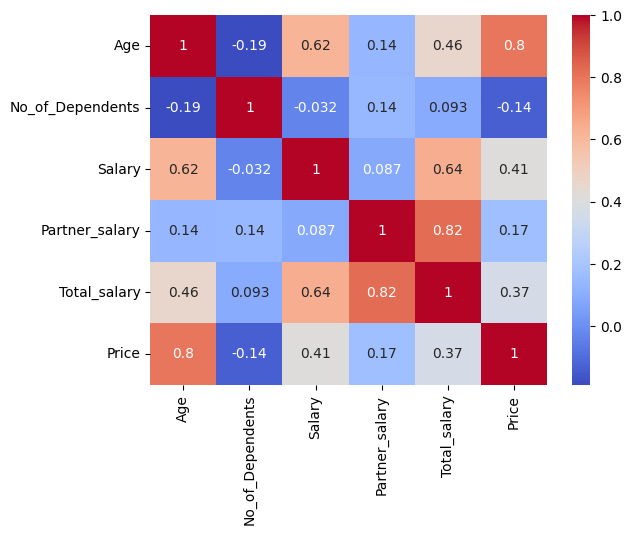

In [ ]:
# Pair plots for numerical variables
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
sns.pairplot(df[numerical_columns])
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Observation:**

* There is very strong correlation between Age of the individual and Price of the car which implies that as age increase the chances of a customer buying a higher priced car increase.
* There is a negative correlation between No. of dependent and Age/ Price of the car/ Salary.

# Key Questions

##1. Do men tend to prefer SUVs more compared to women?

In [ ]:
df.groupby(['Make'])['Gender'].value_counts()

Make       Gender 
Hatchback  Male       565
           Female      15
           Unknown      2
SUV        Female     173
           Male       118
           Unknown      6
Sedan      Male       516
           Female     141
           Unknown     45
Name: count, dtype: int64

In [ ]:
df.groupby(['Make'])['Gender'].value_counts(normalize=True)*100

Make       Gender 
Hatchback  Male      97.08
           Female     2.58
           Unknown    0.34
SUV        Female    58.25
           Male      39.73
           Unknown    2.02
Sedan      Male      73.50
           Female    20.09
           Unknown    6.41
Name: proportion, dtype: float64

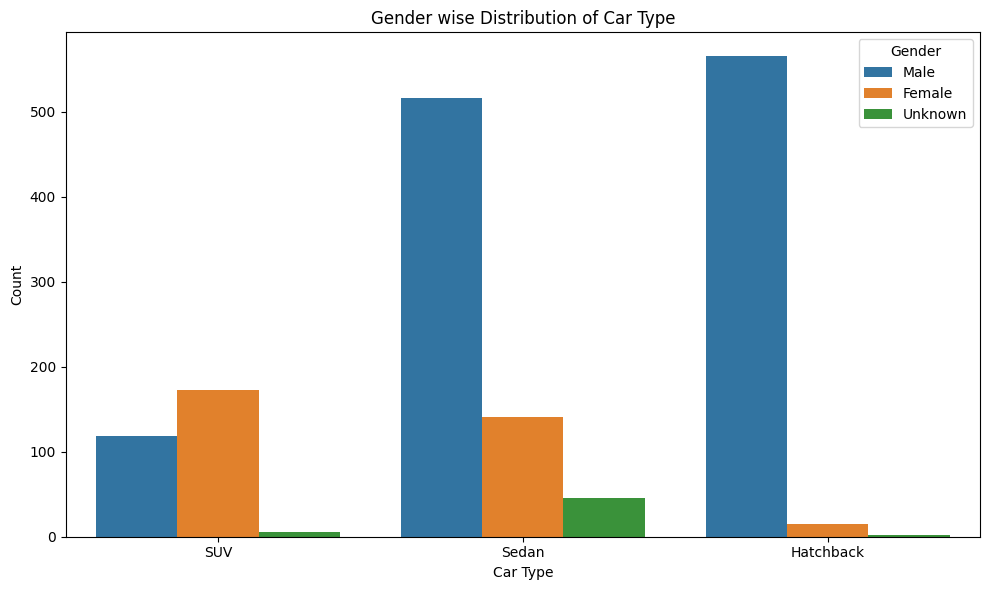

In [ ]:
# Generating a plot for Gender-wise Distribution of Cars
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make', hue='Gender');
plt.title('Gender wise Distribution of Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Observations/ Insights:

* 97.08% of Hatchback purchases made by men and only a small fraction, 2.58%, of Hatchback purchases are made by women. .

* Most SUV buyers are female, with 58.25% of SUV purchases made by women. And Men contribute to 39.73% of SUV purchases.

* 73.50% of Sedan purchases made by men. Females make up 20.09% of the Sedan purchases. .

## Inference:

* Sedan and Hatchback are predominantly purchased by male customer.

* Female customers preferred to buy sedan as per data.

##2. What is the likelihood of a salaried person buying a Sedan?

In [ ]:
df.groupby(['Profession'])['Make'].value_counts()

Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: count, dtype: int64

In [ ]:
df.groupby(['Profession'])['Make'].value_counts(normalize=True)*100

Profession  Make     
Business    Sedan       44.67
            Hatchback   42.34
            SUV         12.99
Salaried    Sedan       44.20
            Hatchback   32.59
            SUV         23.21
Name: proportion, dtype: float64

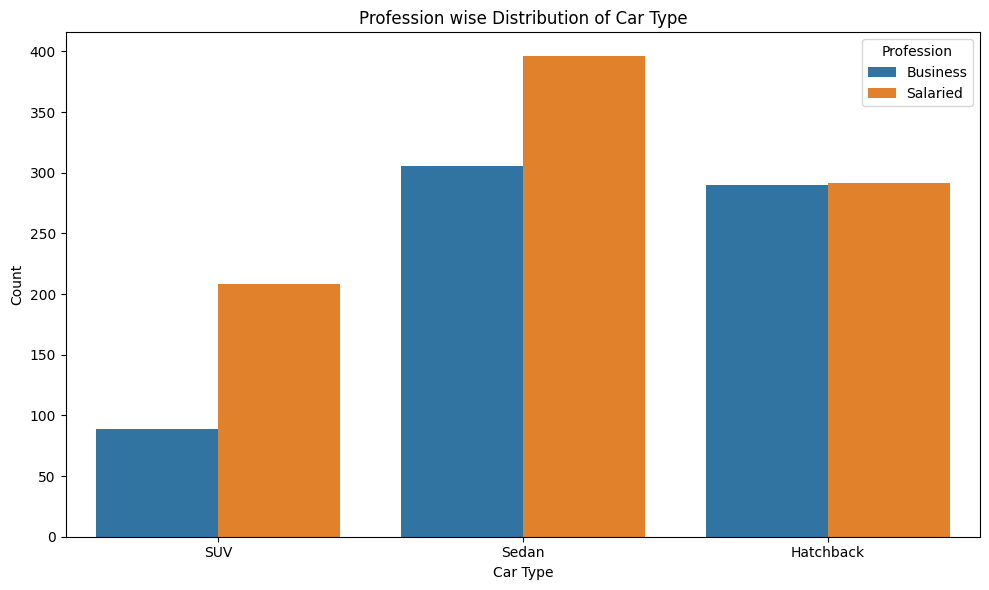

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make', hue='Profession');
plt.title('Profession wise Distribution of Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.legend(title='Profession')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

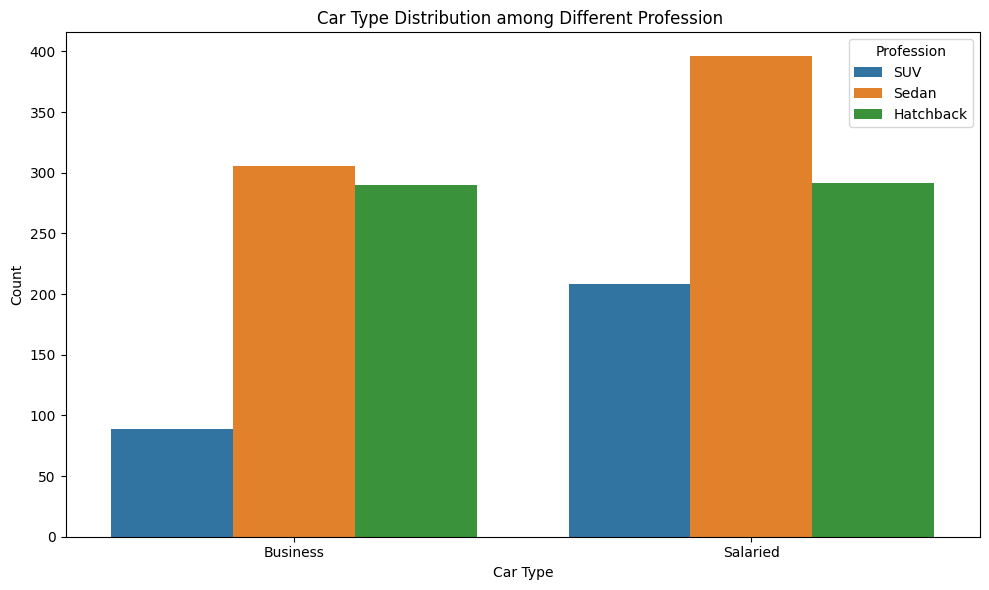

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', hue='Make');
plt.title('Car Type Distribution among Different Profession ')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.legend(title='Profession')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Observations/ Insights:
* 50.17% of Hatchback purchases made by salaried customer and 49.83%, of Hatchback purchases are made by Business Individual.

* 70% of SUV purchases made by Salaried individual. And Business person contribute to 30% of SUV purchases,

* 56.41% of Sedan purchases made by Salaried Person. Business Person make up 43.59% of the Sedan purchases.

## Inference:

* All type of cars are predominantly purchased by salaried customer.
* Most Salaried customer prefer sedan cars to buy.
* Sedan type is the most selling car type among all the three type.

##3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [ ]:
df.groupby(['Profession','Gender'])['Make'].value_counts()

Profession  Gender   Make     
Business    Female   SUV           55
                     Sedan         50
            Male     Hatchback    289
                     Sedan        237
                     SUV           33
            Unknown  Sedan         19
                     SUV            1
                     Hatchback      1
Salaried    Female   SUV          118
                     Sedan         91
                     Hatchback     15
            Male     Sedan        279
                     Hatchback    276
                     SUV           85
            Unknown  Sedan         26
                     SUV            5
                     Hatchback      1
Name: count, dtype: int64

In [ ]:
df.groupby(['Profession','Gender'])['Make'].value_counts(normalize=True)*100

Profession  Gender   Make     
Business    Female   SUV         52.38
                     Sedan       47.62
            Male     Hatchback   51.70
                     Sedan       42.40
                     SUV          5.90
            Unknown  Sedan       90.48
                     Hatchback    4.76
                     SUV          4.76
Salaried    Female   SUV         52.68
                     Sedan       40.62
                     Hatchback    6.70
            Male     Sedan       43.59
                     Hatchback   43.12
                     SUV         13.28
            Unknown  Sedan       81.25
                     SUV         15.62
                     Hatchback    3.12
Name: proportion, dtype: float64

## Observations/ Insights:
* Salaried Male who prefers to buy Sedan is 43.59%.
* Business Male who prefer to buy SUV is 5.9%, whch is least among all.


## Inference:
* Salaried Male is not an easier target for a SUV sale.
* Salaried Female is easier to target for SUV Sale over a sedan sale.
* Business Female have a slight preference for SUVs over Sedans.
* Salaried Males prefer Sedan or hatchback over SUVs.
* Hatchback Type car is most prefered by Business Male.

##4. How does the amount spent on purchasing automobiles vary by gender?

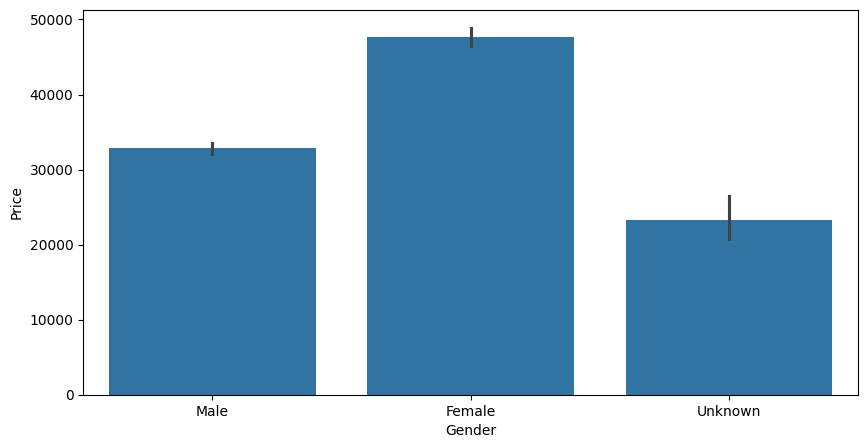

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = 'Gender', y = 'Price');

In [ ]:
df.groupby(['Gender'])['Price'].mean()

Gender
Female    47705.17
Male      32817.35
Unknown   23339.62
Name: Price, dtype: float64

## Observations/ Insights:
* Average Amount spent on purchasing automobile by Female is 47705
* Average Amount spent on purchasing automobile by Male is 32817

## Inference:

Females are more flexible in purchasing high-cost vehicle compared to male customers

##5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

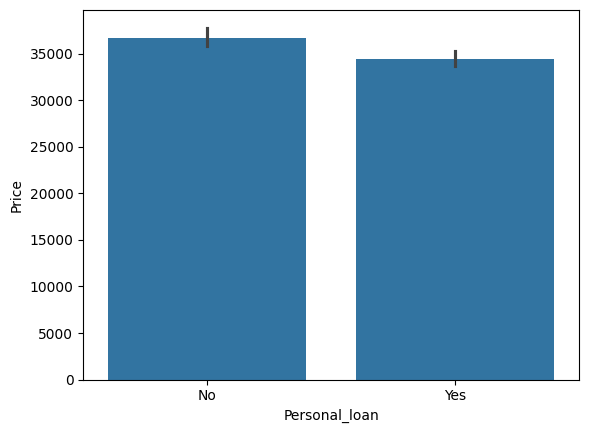

In [ ]:
sns.barplot(data=df, x = 'Personal_loan', y = 'Price', );

In [ ]:
df.groupby(['Personal_loan'])['Price'].mean()

Personal_loan
No    36742.71
Yes   34457.07
Name: Price, dtype: float64

## Observations/ Insights:
* Average spent on purchasing automobile by individuals who took a personal loan is 34457
* Average spent on purchasing automobile by individuals who do not taken a personal loan is 36742
* There is very less difference between the Average amount spent on purchasing automobile by individuals who took personal loan and who do not taken personal loan.

##6. How does having a working partner influence the purchase of higher-priced cars?

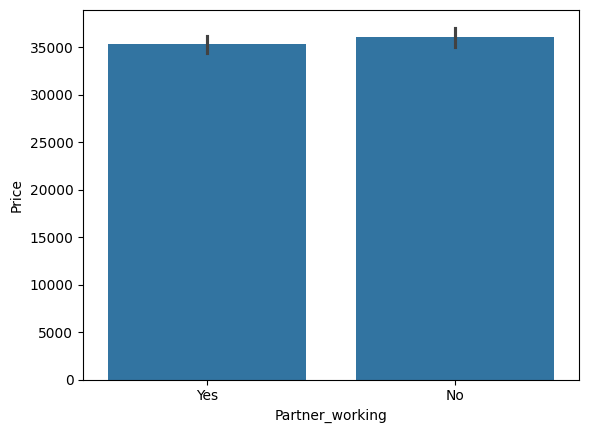

In [ ]:
sns.barplot(data=df, x = 'Partner_working', y = 'Price');

In [93]:
df.groupby(['Partner_working'])['Price'].mean()

Partner_working
No    36000.00
Yes   35267.28
Name: Price, dtype: float64

## Observations/ Insights:
* If the partner is not working, the average price of the car is slightly greater than if partner is working, which implies that Working partner little influces over the price of the car.

## Actionable Insights:

* The count of Married customers who brought vehicles is very high compared to the count of Single customers.

* The count of customers without a house loan is also significantly higher compared to the count of customers with a loan.

* Sedans are the most selling car type and SUVs are the least selling car type.

## Business Recommendations:

* Married and Without house loan customers are key customer segment to increase the sale.

* Male customers prefer sedans and sedan is most selling car type, which make it good for targeted marketing campaigns and boost sales